# Pepper kinematics

In this notebook, we'll try IKPy on the pepper robot

![http://doc.aldebaran.com/2-8/_images/juliet_links_xyz.png](http://doc.aldebaran.com/2-8/_images/juliet_links_xyz.png)

You will get the following chains:

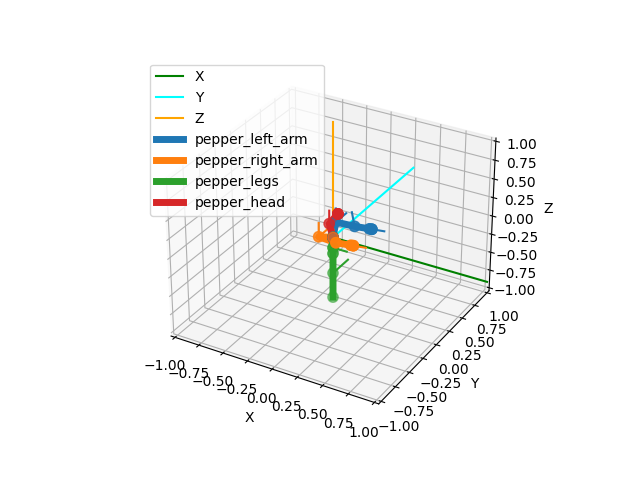

Let's begin!

## Requirements

To get this notebook to work, you need to install IKPy, version >= 3.0

Also, if you want to use interactive 3D visualisation (highly recommended), you must use the `widget` matplotlib backend

In [1]:
# Some necessary imports
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot

# Optional: support for 3D plotting in the NB
%matplotlib widget
# turn this off, if you don't need it

 ## Robot import and setup

In [7]:
# First, let's import the pepper chains
pepper_left_arm_chain = Chain.from_json_file("../resources/pepper/pepper_left_arm.json")
pepper_right_arm_chain = Chain.from_json_file("../resources/pepper/pepper_right_arm.json")
pepper_legs_chain = Chain.from_json_file("../resources/pepper/pepper_legs.json")
pepper_head_chain = Chain.from_json_file("../resources/pepper/pepper_head.json")

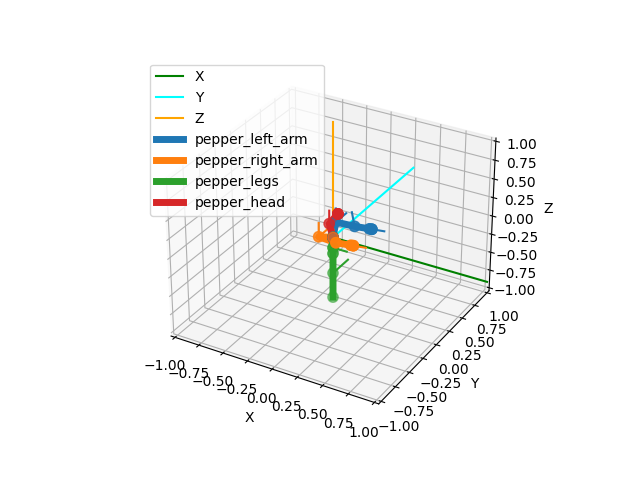

In [3]:
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure();
pepper_left_arm_chain.plot([0] * (len(pepper_left_arm_chain)), ax)
pepper_right_arm_chain.plot([0] * (len(pepper_right_arm_chain)), ax)
pepper_legs_chain.plot([0] * (len(pepper_legs_chain)), ax)
pepper_head_chain.plot([0] * (len(pepper_head_chain)), ax)
ax.legend()


## Inverse kinematics

interactive(children=(FloatSlider(value=0.29704547692436817, description='xl', max=0.7970454769243682, min=-0.…

<function __main__.goto(xl, yl, zl, xr, yr, zr)>

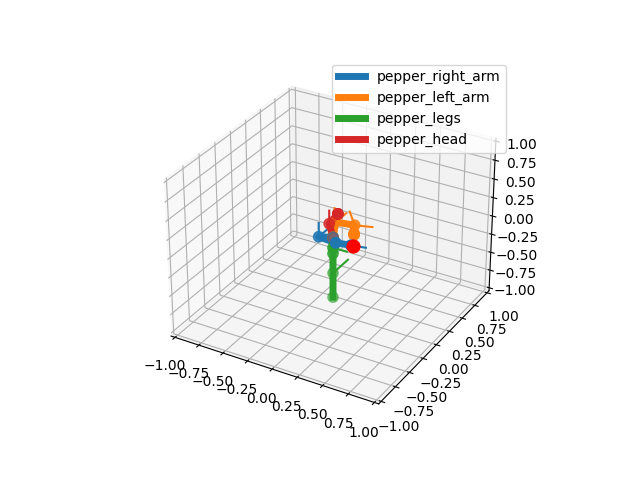

In [6]:
### Let's try some IK
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
fig, ax = plot.init_3d_figure()

x, y, z = pepper_right_arm_chain.forward_kinematics([0] * (len(pepper_left_arm_chain)))[:3,3]
size = 0.5

xlim = ax.get_xlim3d()
ylim = ax.get_ylim3d()
zlim = ax.get_zlim3d()
def goto(xl, yl, zl, xr, yr, zr):
    ax.clear()
    ax.set_xlim3d(xlim)
    ax.set_ylim3d(ylim)
    ax.set_zlim3d(zlim)
    
    frame_target = np.eye(4)
    frame_target[:3, 3] = [xr,yr,zr]

    ik = pepper_right_arm_chain.inverse_kinematics_frame(frame_target, optimizer="scalar")
    pepper_right_arm_chain.plot(ik, ax, target=[xr,yr,zr])

    frame_target[:3, 3] = [xl,yl,zl]

    ik = pepper_left_arm_chain.inverse_kinematics_frame(frame_target, optimizer="scalar")
    pepper_left_arm_chain.plot(ik, ax, target=[xl,yl,zl])

    # pepper_left_arm_chain.plot([0] * (len(pepper_left_arm_chain)), ax)
    pepper_legs_chain.plot([0] * (len(pepper_legs_chain)), ax)
    pepper_head_chain.plot([0] * (len(pepper_head_chain)), ax)
    ax.legend()
    
interact(goto, 
         xl=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         yl=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         zl=FloatSlider(min=z-size, max=z+size, value=z, step=0.01),
         xr=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         yr=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         zr=FloatSlider(min=z-size, max=z+size, value=z, step=0.01))
